<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

This is a minimal example showing how to train a fastai model on Kaggle, and save it so you can use it in your app.

In [ ]:
# Make sure we've got the latest version of fastai:
# !pip install -Uqq fastai

## fastai.vision

First, import all the stuff we need from fastai:

### from fastai.vision.all import *

In [ ]:
from fastdebug.utils import *

In [ ]:
from fastai.vision.all import *

In [ ]:
import fastai.vision.all as fva

In [ ]:
# fva. # to check what it has inside

## Access fastai datasets and view images

### URLs

This is a dataset of cats and dogs

In [ ]:
class URLs():
    "Global constants for dataset and model URLs."
    LOCAL_PATH = Path.cwd()
    MDL = 'http://files.fast.ai/models/'
    GOOGLE = 'https://storage.googleapis.com/'
    S3  = 'https://s3.amazonaws.com/fast-ai-'
    URL = f'{S3}sample/'

    S3_IMAGE    = f'{S3}imageclas/'
    S3_IMAGELOC = f'{S3}imagelocal/'
    S3_AUDI     = f'{S3}audio/'
    S3_NLP      = f'{S3}nlp/'
    S3_COCO     = f'{S3}coco/'
    S3_MODEL    = f'{S3}modelzoo/'

    # main datasets
    ADULT_SAMPLE        = f'{URL}adult_sample.tgz'
    BIWI_SAMPLE         = f'{URL}biwi_sample.tgz'
    CIFAR               = f'{URL}cifar10.tgz'
    COCO_SAMPLE         = f'{S3_COCO}coco_sample.tgz'
    COCO_TINY           = f'{S3_COCO}coco_tiny.tgz'
    HUMAN_NUMBERS       = f'{URL}human_numbers.tgz'
    IMDB                = f'{S3_NLP}imdb.tgz'
    IMDB_SAMPLE         = f'{URL}imdb_sample.tgz'
    ML_SAMPLE           = f'{URL}movie_lens_sample.tgz'
    ML_100k             = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
    MNIST_SAMPLE        = f'{URL}mnist_sample.tgz'
    MNIST_TINY          = f'{URL}mnist_tiny.tgz'
    MNIST_VAR_SIZE_TINY = f'{S3_IMAGE}mnist_var_size_tiny.tgz'
    PLANET_SAMPLE       = f'{URL}planet_sample.tgz'
    PLANET_TINY         = f'{URL}planet_tiny.tgz'
    IMAGENETTE          = f'{S3_IMAGE}imagenette2.tgz'
    IMAGENETTE_160      = f'{S3_IMAGE}imagenette2-160.tgz'
    IMAGENETTE_320      = f'{S3_IMAGE}imagenette2-320.tgz'
    IMAGEWOOF           = f'{S3_IMAGE}imagewoof2.tgz'
    IMAGEWOOF_160       = f'{S3_IMAGE}imagewoof2-160.tgz'
    IMAGEWOOF_320       = f'{S3_IMAGE}imagewoof2-320.tgz'
    IMAGEWANG           = f'{S3_IMAGE}imagewang.tgz'
    IMAGEWANG_160       = f'{S3_IMAGE}imagewang-160.tgz'
    IMAGEWANG_320       = f'{S3_IMAGE}imagewang-320.tgz'

    # kaggle competitions download dogs-vs-cats -p {DOGS.absolute()}
    DOGS = f'{URL}dogscats.tgz'

    # image classification datasets
    CALTECH_101  = f'{S3_IMAGE}caltech_101.tgz'
    CARS         = f'{S3_IMAGE}stanford-cars.tgz'
    CIFAR_100    = f'{S3_IMAGE}cifar100.tgz'
    CUB_200_2011 = f'{S3_IMAGE}CUB_200_2011.tgz'
    FLOWERS      = f'{S3_IMAGE}oxford-102-flowers.tgz'
    FOOD         = f'{S3_IMAGE}food-101.tgz'
    MNIST        = f'{S3_IMAGE}mnist_png.tgz'
    PETS         = f'{S3_IMAGE}oxford-iiit-pet.tgz'

    # NLP datasets
    AG_NEWS                 = f'{S3_NLP}ag_news_csv.tgz'
    AMAZON_REVIEWS          = f'{S3_NLP}amazon_review_full_csv.tgz'
    AMAZON_REVIEWS_POLARITY = f'{S3_NLP}amazon_review_polarity_csv.tgz'
    DBPEDIA                 = f'{S3_NLP}dbpedia_csv.tgz'
    MT_ENG_FRA              = f'{S3_NLP}giga-fren.tgz'
    SOGOU_NEWS              = f'{S3_NLP}sogou_news_csv.tgz'
    WIKITEXT                = f'{S3_NLP}wikitext-103.tgz'
    WIKITEXT_TINY           = f'{S3_NLP}wikitext-2.tgz'
    YAHOO_ANSWERS           = f'{S3_NLP}yahoo_answers_csv.tgz'
    YELP_REVIEWS            = f'{S3_NLP}yelp_review_full_csv.tgz'
    YELP_REVIEWS_POLARITY   = f'{S3_NLP}yelp_review_polarity_csv.tgz'

    # Image localization datasets
    BIWI_HEAD_POSE     = f"{S3_IMAGELOC}biwi_head_pose.tgz"
    CAMVID             = f'{S3_IMAGELOC}camvid.tgz'
    CAMVID_TINY        = f'{URL}camvid_tiny.tgz'
    LSUN_BEDROOMS      = f'{S3_IMAGE}bedroom.tgz'
    PASCAL_2007        = f'{S3_IMAGELOC}pascal_2007.tgz'
    PASCAL_2012        = f'{S3_IMAGELOC}pascal_2012.tgz'

    # Audio classification datasets
    MACAQUES           = f'{GOOGLE}ml-animal-sounds-datasets/macaques.zip'
    ZEBRA_FINCH        = f'{GOOGLE}ml-animal-sounds-datasets/zebra_finch.zip'

    # Medical Imaging datasets
    #SKIN_LESION        = f'{S3_IMAGELOC}skin_lesion.tgz'
    SIIM_SMALL         = f'{S3_IMAGELOC}siim_small.tgz'
    TCGA_SMALL         = f'{S3_IMAGELOC}tcga_small.tgz'

    #Pretrained models
    OPENAI_TRANSFORMER = f'{S3_MODEL}transformer.tgz'
    WT103_FWD          = f'{S3_MODEL}wt103-fwd.tgz'
    WT103_BWD          = f'{S3_MODEL}wt103-bwd.tgz'

    @snoop
    def path(
        url:str='.', # File to download
        c_key:str='archive' # Key in `Config` where to save URL
    ) -> Path:
        "Local path where to download based on `c_key`"
        fname = url.split('/')[-1]
        local_path = URLs.LOCAL_PATH/('models' if c_key=='model' else 'data')/fname
        if local_path.exists(): return local_path
        return fastai_path(c_key)/fname
# File:           ~/mambaforge/lib/python3.9/site-packages/fastai/data/external.py
# Type:           type
# Subclasses:

In [ ]:
URLs.DOGS

'https://s3.amazonaws.com/fast-ai-sample/dogscats.tgz'

In [ ]:
URLs.path(URLs.DOGS)

13:08:35.04 >>> Call to URLs.path in File "/var/folders/gz/ch3n2mp51m9386sytqf97s6w0000gn/T/ipykernel_5735/3463182703.py", line 91
13:08:35.04 .......... url = 'https://s3.amazonaws.com/fast-ai-sample/dogscats.tgz'
13:08:35.04 .......... c_key = 'archive'
13:08:35.04   91 |     def path(
13:08:35.04   96 |         fname = url.split('/')[-1]
13:08:35.04 .............. fname = 'dogscats.tgz'
13:08:35.04   97 |         local_path = URLs.LOCAL_PATH/('models' if c_key=='model' else 'data')/fname
13:08:35.04 .............. local_path = Path('/Users/Natsume/Documents/fastdebug/nbs/fastai_notebooks/data/dogscats.tgz')
13:08:35.04   98 |         if local_path.exists(): return local_path
13:08:35.04   99 |         return fastai_path(c_key)/fname
13:08:35.04 <<< Return value from URLs.path: Path('/Users/Natsume/.fastai/archive/dogscats.tgz')


Path('/Users/Natsume/.fastai/archive/dogscats.tgz')

In [ ]:
URLs.LOCAL_PATH

Path('/Users/Natsume/Documents/fastdebug/nbs/fastai_notebooks')

In [ ]:
URLs.URL

'https://s3.amazonaws.com/fast-ai-sample/'

In [ ]:
list(URLs.__dict__.keys())

['__module__',
 '__doc__',
 'LOCAL_PATH',
 'MDL',
 'GOOGLE',
 'S3',
 'URL',
 'S3_IMAGE',
 'S3_IMAGELOC',
 'S3_AUDI',
 'S3_NLP',
 'S3_COCO',
 'S3_MODEL',
 'ADULT_SAMPLE',
 'BIWI_SAMPLE',
 'CIFAR',
 'COCO_SAMPLE',
 'COCO_TINY',
 'HUMAN_NUMBERS',
 'IMDB',
 'IMDB_SAMPLE',
 'ML_SAMPLE',
 'ML_100k',
 'MNIST_SAMPLE',
 'MNIST_TINY',
 'MNIST_VAR_SIZE_TINY',
 'PLANET_SAMPLE',
 'PLANET_TINY',
 'IMAGENETTE',
 'IMAGENETTE_160',
 'IMAGENETTE_320',
 'IMAGEWOOF',
 'IMAGEWOOF_160',
 'IMAGEWOOF_320',
 'IMAGEWANG',
 'IMAGEWANG_160',
 'IMAGEWANG_320',
 'DOGS',
 'CALTECH_101',
 'CARS',
 'CIFAR_100',
 'CUB_200_2011',
 'FLOWERS',
 'FOOD',
 'MNIST',
 'PETS',
 'AG_NEWS',
 'AMAZON_REVIEWS',
 'AMAZON_REVIEWS_POLARITY',
 'DBPEDIA',
 'MT_ENG_FRA',
 'SOGOU_NEWS',
 'WIKITEXT',
 'WIKITEXT_TINY',
 'YAHOO_ANSWERS',
 'YELP_REVIEWS',
 'YELP_REVIEWS_POLARITY',
 'BIWI_HEAD_POSE',
 'CAMVID',
 'CAMVID_TINY',
 'LSUN_BEDROOMS',
 'PASCAL_2007',
 'PASCAL_2012',
 'MACAQUES',
 'ZEBRA_FINCH',
 'SIIM_SMALL',
 'TCGA_SMALL',
 'OPENAI_

In [ ]:
class URLs():
    "Global constants for dataset and model URLs."
    LOCAL_PATH = Path.cwd()
    MDL = 'http://files.fast.ai/models/'
    GOOGLE = 'https://storage.googleapis.com/'
    S3  = 'https://s3.amazonaws.com/fast-ai-'
    URL = f'{S3}sample/'

    S3_IMAGE    = f'{S3}imageclas/'
    S3_IMAGELOC = f'{S3}imagelocal/'
    S3_AUDI     = f'{S3}audio/'
    S3_NLP      = f'{S3}nlp/'
    S3_COCO     = f'{S3}coco/'
    S3_MODEL    = f'{S3}modelzoo/'

    # main datasets
    ADULT_SAMPLE        = f'{URL}adult_sample.tgz'
    BIWI_SAMPLE         = f'{URL}biwi_sample.tgz'
    CIFAR               = f'{URL}cifar10.tgz'
    COCO_SAMPLE         = f'{S3_COCO}coco_sample.tgz'
    COCO_TINY           = f'{S3_COCO}coco_tiny.tgz'
    HUMAN_NUMBERS       = f'{URL}human_numbers.tgz'
    IMDB                = f'{S3_NLP}imdb.tgz'
    IMDB_SAMPLE         = f'{URL}imdb_sample.tgz'
    ML_SAMPLE           = f'{URL}movie_lens_sample.tgz'
    ML_100k             = 'https://files.grouplens.org/datasets/movielens/ml-100k.zip'
    MNIST_SAMPLE        = f'{URL}mnist_sample.tgz'
    MNIST_TINY          = f'{URL}mnist_tiny.tgz'
    MNIST_VAR_SIZE_TINY = f'{S3_IMAGE}mnist_var_size_tiny.tgz'
    PLANET_SAMPLE       = f'{URL}planet_sample.tgz'
    PLANET_TINY         = f'{URL}planet_tiny.tgz'
    IMAGENETTE          = f'{S3_IMAGE}imagenette2.tgz'
    IMAGENETTE_160      = f'{S3_IMAGE}imagenette2-160.tgz'
    IMAGENETTE_320      = f'{S3_IMAGE}imagenette2-320.tgz'
    IMAGEWOOF           = f'{S3_IMAGE}imagewoof2.tgz'
    IMAGEWOOF_160       = f'{S3_IMAGE}imagewoof2-160.tgz'
    IMAGEWOOF_320       = f'{S3_IMAGE}imagewoof2-320.tgz'
    IMAGEWANG           = f'{S3_IMAGE}imagewang.tgz'
    IMAGEWANG_160       = f'{S3_IMAGE}imagewang-160.tgz'
    IMAGEWANG_320       = f'{S3_IMAGE}imagewang-320.tgz'

    # kaggle competitions download dogs-vs-cats -p {DOGS.absolute()}
    DOGS = f'{URL}dogscats.tgz'

    # image classification datasets
    CALTECH_101  = f'{S3_IMAGE}caltech_101.tgz'
    CARS         = f'{S3_IMAGE}stanford-cars.tgz'
    CIFAR_100    = f'{S3_IMAGE}cifar100.tgz'
    CUB_200_2011 = f'{S3_IMAGE}CUB_200_2011.tgz'
    FLOWERS      = f'{S3_IMAGE}oxford-102-flowers.tgz'
    FOOD         = f'{S3_IMAGE}food-101.tgz'
    MNIST        = f'{S3_IMAGE}mnist_png.tgz'
    PETS         = f'{S3_IMAGE}oxford-iiit-pet.tgz'

    # NLP datasets
    AG_NEWS                 = f'{S3_NLP}ag_news_csv.tgz'
    AMAZON_REVIEWS          = f'{S3_NLP}amazon_review_full_csv.tgz'
    AMAZON_REVIEWS_POLARITY = f'{S3_NLP}amazon_review_polarity_csv.tgz'
    DBPEDIA                 = f'{S3_NLP}dbpedia_csv.tgz'
    MT_ENG_FRA              = f'{S3_NLP}giga-fren.tgz'
    SOGOU_NEWS              = f'{S3_NLP}sogou_news_csv.tgz'
    WIKITEXT                = f'{S3_NLP}wikitext-103.tgz'
    WIKITEXT_TINY           = f'{S3_NLP}wikitext-2.tgz'
    YAHOO_ANSWERS           = f'{S3_NLP}yahoo_answers_csv.tgz'
    YELP_REVIEWS            = f'{S3_NLP}yelp_review_full_csv.tgz'
    YELP_REVIEWS_POLARITY   = f'{S3_NLP}yelp_review_polarity_csv.tgz'

    # Image localization datasets
    BIWI_HEAD_POSE     = f"{S3_IMAGELOC}biwi_head_pose.tgz"
    CAMVID             = f'{S3_IMAGELOC}camvid.tgz'
    CAMVID_TINY        = f'{URL}camvid_tiny.tgz'
    LSUN_BEDROOMS      = f'{S3_IMAGE}bedroom.tgz'
    PASCAL_2007        = f'{S3_IMAGELOC}pascal_2007.tgz'
    PASCAL_2012        = f'{S3_IMAGELOC}pascal_2012.tgz'

    # Audio classification datasets
    MACAQUES           = f'{GOOGLE}ml-animal-sounds-datasets/macaques.zip'
    ZEBRA_FINCH        = f'{GOOGLE}ml-animal-sounds-datasets/zebra_finch.zip'

    # Medical Imaging datasets
    #SKIN_LESION        = f'{S3_IMAGELOC}skin_lesion.tgz'
    SIIM_SMALL         = f'{S3_IMAGELOC}siim_small.tgz'
    TCGA_SMALL         = f'{S3_IMAGELOC}tcga_small.tgz'

    #Pretrained models
    OPENAI_TRANSFORMER = f'{S3_MODEL}transformer.tgz'
    WT103_FWD          = f'{S3_MODEL}wt103-fwd.tgz'
    WT103_BWD          = f'{S3_MODEL}wt103-bwd.tgz'

    def path(
        url:str='.', # File to download
        c_key:str='archive' # Key in `Config` where to save URL
    ) -> Path:
        "Local path where to download based on `c_key`"
        fname = url.split('/')[-1]
        local_path = URLs.LOCAL_PATH/('models' if c_key=='model' else 'data')/fname
        if local_path.exists(): return local_path
        return fastai_path(c_key)/fname
# File:           ~/mambaforge/lib/python3.9/site-packages/fastai/data/external.py
# Type:           type
# Subclasses:

### untar_data(url: str, archive: pathlib.Path = None, data: pathlib.Path = None, c_key: str = 'data', force_download: bool = False, base: str = '~/.fastai') -> pathlib.Path
download dataset with a url and store it into a path and return it

In [ ]:
from fastai.data.external import *
from fastai.data.external import FastDownload
import fastai

In [ ]:
untar_data

<function fastai.data.external.untar_data(url: 'str', archive: 'Path' = None, data: 'Path' = None, c_key: 'str' = 'data', force_download: 'bool' = False, base: 'str' = '~/.fastai') -> 'Path'>

In [ ]:
@snoop
def untar_data(
    url:str, # File to download
    archive:Path=None, # Optional override for `Config`'s `archive` key
    data:Path=None, # Optional override for `Config`'s `data` key
    c_key:str='data', # Key in `Config` where to extract file
    force_download:bool=False, # Setting to `True` will overwrite any existing copy of data
    base:str='~/.fastai' # Directory containing config file and base of relative paths
) -> Path: # Path to extracted file(s)
    "Download `url` using `FastDownload.get`"
    pp(doc_sig(FastDownload), doc_sig(fastai_cfg))
#     return
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base=base)
    pp(chk(d))
    pp(doc_sig(d.get))
#     return
    return d.get(url, force=force_download, extract_key=c_key)
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/data/external.py
# Type:      function

In [ ]:
#|eval: false
path = untar_data(URLs.PETS)/'images'

13:08:35.21 >>> Call to untar_data in File "/var/folders/gz/ch3n2mp51m9386sytqf97s6w0000gn/T/ipykernel_5735/2680883389.py", line 2
13:08:35.21 ...... url = 'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'
13:08:35.21 ...... archive = None
13:08:35.21 ...... data = None
13:08:35.21 ...... c_key = 'data'
13:08:35.21 ...... force_download = False
13:08:35.21 ...... base = '~/.fastai'
13:08:35.21    2 | def untar_data(
13:08:35.21   11 |     pp(doc_sig(FastDownload), doc_sig(fastai_cfg))
13:08:35.22 LOG:
13:08:35.51 .... doc_sig(FastDownload) = ((<class 'fastdownload.core.FastDownload'>, <class 'object'>),
13:08:35.51                               'no doc',
13:08:35.51                               <Signature (cfg=None, base='~/.fastdownload', archive=None, data=None, module=None)>)
13:08:35.51 .... doc_sig(fastai_cfg) = ('no mro',
13:08:35.51                             "`Config` object for fastai's `config.ini`",
13:08:35.51                             <Signature () -> 'C

In [ ]:
def untar_data(
    url:str, # File to download
    archive:Path=None, # Optional override for `Config`'s `archive` key
    data:Path=None, # Optional override for `Config`'s `data` key
    c_key:str='data', # Key in `Config` where to extract file
    force_download:bool=False, # Setting to `True` will overwrite any existing copy of data
    base:str='~/.fastai' # Directory containing config file and base of relative paths
) -> Path: # Path to extracted file(s)
    "Download `url` using `FastDownload.get`"
    d = FastDownload(fastai_cfg(), module=fastai.data, archive=archive, data=data, base=base)
    return d.get(url, force=force_download, extract_key=c_key)
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/data/external.py
# Type:      function

### PILImage.create vs Image.open
PILImage.create can open and display images from str, path, ndarray, Tensor, numpy, bytes; but PIL.Image.open only for str filename

img created by PILImage.create can be showed inline, but not by Image.open

In [ ]:
# fastnbs("Image.open") # check to see how to use PIL.Image.open
# fastnbs("PILImage.create") # check docs and run source
# Image.open??

In [ ]:
from fastai.vision.core import PILImage
from random import randint

In [ ]:
path.ls()

(#7393) [Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Siamese_53.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/leonberger_6.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Siamese_47.jpg'),Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/shiba_inu_136.jpg')...]

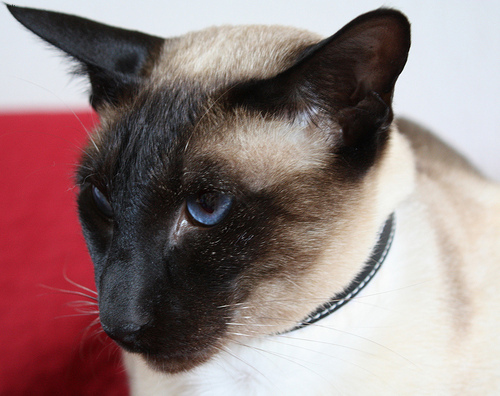

13:08:35.77 LOG:
13:08:35.77 .... im = PILImage mode=RGB size=500x396
13:08:35.77 .... randf = Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Siamese_89.jpg')
13:08:35.77 .... im.shape = (396, 500)
13:08:35.77 .... im.size = (500, 396)


In [ ]:
# count_files_in_subfolders(path)

randf = path.ls()[randint(0, len(path.ls())-1)]
# im = Image.open(randf)
im = PILImage.create(randf)
im
_ = pp(im, randf, im.shape, im.size)

In [ ]:
def randomdisplay(path):
    randf = path.ls()[randint(0, len(path.ls())-1)]
    # im = Image.open(randf)
    im = PILImage.create(randf)
    _ = pp(im, randf, im.shape, im.size)
    return im

13:08:35.83 LOG:
13:08:35.84 .... im = PILImage mode=RGB size=500x375
13:08:35.84 .... randf = Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/keeshond_135.jpg')
13:08:35.84 .... im.shape = (375, 500)
13:08:35.84 .... im.size = (500, 375)


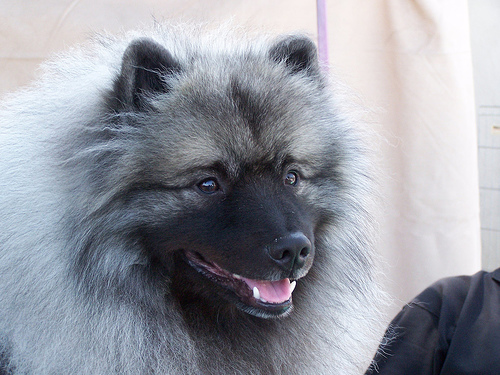

In [ ]:
randomdisplay(path)

<AxesSubplot:>

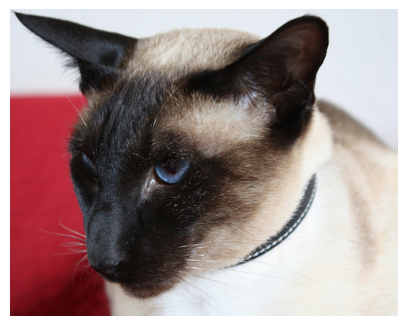

In [ ]:
im.show() # display it inline rather than in a separate window as im created by Image.open

In [ ]:
# fastnbs("show_image(") # run this to see the docs and source;

In [ ]:
@patch
@snoop
def show(self:PILImage, ctx=None, **kwargs):
    "Show image using `merge(self._show_args, kwargs)`"
    return show_image(self, ctx=ctx, **merge(self._show_args, kwargs))
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/vision/core.py
# Type:      method

13:08:36.04 >>> Call to show in File "/var/folders/gz/ch3n2mp51m9386sytqf97s6w0000gn/T/ipykernel_5735/1768377215.py", line 3
13:08:36.04 ...... self = PILImage mode=RGB size=500x396
13:08:36.04 ...... ctx = None
13:08:36.04 ...... kwargs = {}
13:08:36.04    3 | def show(self:PILImage, ctx=None, **kwargs):
13:08:36.04    5 |     return show_image(self, ctx=ctx, **merge(self._show_args, kwargs))
13:08:36.06 <<< Return value from show: <AxesSubplot:>


<AxesSubplot:>

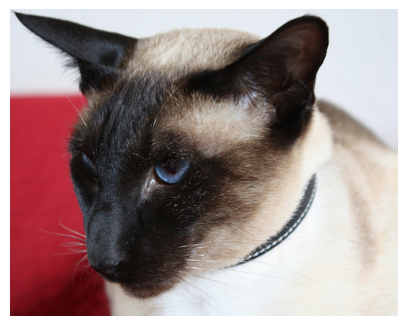

In [ ]:
im.show()

In [ ]:
@patch
def show(self:PILImage, ctx=None, **kwargs):
    "Show image using `merge(self._show_args, kwargs)`"
    return show_image(self, ctx=ctx, **merge(self._show_args, kwargs))
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/vision/core.py
# Type:      method

## Build dataloaders

### is_cat
get label based on Capital letter from a filename

We need a way to label our images as dogs or cats. In this dataset, pictures of cats are given a filename that starts with a capital letter:

13:08:36.21 LOG:
13:08:36.21 .... im = PILImage mode=RGB size=500x333
13:08:36.21 .... randf = Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/pug_47.jpg')
13:08:36.21 .... im.shape = (333, 500)
13:08:36.21 .... im.size = (500, 333)


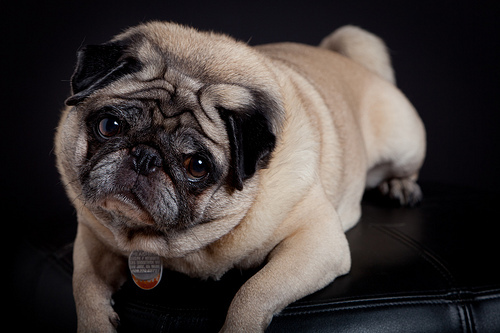

In [ ]:
randomdisplay(path)

In [ ]:
Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Ragdoll_250.jpg')
Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Ragdoll_250.jpg').name
Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Ragdoll_250.jpg').name[0]
Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Ragdoll_250.jpg').name[0].isupper()

Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/Ragdoll_250.jpg')

'Ragdoll_250.jpg'

'R'

True

In [ ]:
def is_cat(x): return x[0].isupper()

In [ ]:
def randomdisplay(path):
    randf = path.ls()[randint(0, len(path.ls())-1)]
    im = PILImage.create(randf)
    pp(im, randf, im.shape, im.size, is_cat(randf.name))
    return randf, im

13:08:36.36 LOG:
13:08:36.36 .... im = PILImage mode=RGB size=500x335
13:08:36.36 .... randf = Path('/Users/Natsume/.fastai/data/oxford-iiit-pet/images/great_pyrenees_6.jpg')
13:08:36.36 .... im.shape = (335, 500)
13:08:36.36 .... im.size = (500, 335)
13:08:36.36 .... is_cat(randf.name) = False


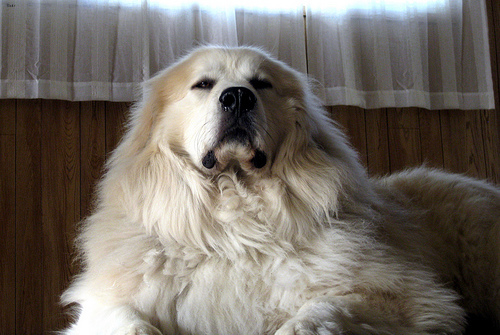

In [ ]:
f, _ = randomdisplay(path)
_

## how to create dataloaders with `from_name_func`

### DataLoaders

Now we can create our `DataLoaders`:

In [ ]:
from __future__ import annotations # to ensure path:str|Path='.' can work

In [ ]:
@docs
class DataLoaders(GetAttr):
    "Basic wrapper around several `DataLoader`s."
    _default='train'
    def __init__(self, 
        *loaders, # `DataLoader` objects to wrap
        path:str|Path='.', # Path to store export objects
        device=None # Device to put `DataLoaders`
    ):
        self.loaders,self.path = list(loaders),Path(path)
        if device is not None or hasattr(loaders[0],'to'): self.device = device

    def __getitem__(self, i): return self.loaders[i]
    def __len__(self): return len(self.loaders)
    def new_empty(self):
        loaders = [dl.new(dl.dataset.new_empty()) for dl in self.loaders]
        return type(self)(*loaders, path=self.path, device=self.device)

    def _set(i, self, v): self.loaders[i] = v
    train   ,valid    = add_props(lambda i,x: x[i], _set)
    train_ds,valid_ds = add_props(lambda i,x: x[i].dataset)

    @property
    def device(self): return self._device

    @device.setter
    def device(self, 
        d # Device to put `DataLoaders`
    ):
        for dl in self.loaders: dl.to(d)
        self._device = d

    def to(self, 
        device # Device to put `DataLoaders`
    ):
        self.device = device
        return self
            
    def _add_tfms(self, tfms, event, dl_idx):
        "Adds `tfms` to `event` on `dl`"
        if(isinstance(dl_idx,str)): dl_idx = 0 if(dl_idx=='train') else 1
        dl_tfms = getattr(self[dl_idx], event)
        apply(dl_tfms.add, tfms)
        
    def add_tfms(self,
        tfms, # List of `Transform`(s) or `Pipeline` to apply
        event, # When to run `Transform`. Events mentioned in `TfmdDL`
        loaders=None # List of `DataLoader` objects to add `tfms` to
    ):
        "Adds `tfms` to `events` on `loaders`"
        if(loaders is None): loaders=range(len(self.loaders))
        if not is_listy(loaders): loaders = listify(loaders)
        for loader in loaders:
            self._add_tfms(tfms,event,loader)      

    def cuda(self): return self.to(device=default_device())
    def cpu(self):  return self.to(device=torch.device('cpu'))

    @classmethod
    def from_dsets(cls, 
        *ds, # `Datasets` object(s)
        path:str|Path='.', # Path to put in `DataLoaders`
        bs:int=64, # Size of batch
        device=None, # Device to put `DataLoaders`
        dl_type=TfmdDL, # Type of `DataLoader`
        **kwargs
    ):
        default = (True,) + (False,) * (len(ds)-1)
        defaults = {'shuffle': default, 'drop_last': default}
        tfms = {k:tuple(Pipeline(kwargs[k]) for i in range_of(ds)) for k in _batch_tfms if k in kwargs}
        kwargs = merge(defaults, {k: tuplify(v, match=ds) for k,v in kwargs.items() if k not in _batch_tfms}, tfms)
        kwargs = [{k: v[i] for k,v in kwargs.items()} for i in range_of(ds)]
        return cls(*[dl_type(d, bs=bs, **k) for d,k in zip(ds, kwargs)], path=path, device=device)

    @classmethod
    def from_dblock(cls, 
        dblock, # `DataBlock` object
        source, # Source of data. Can be `Path` to files
        path:str|Path='.', # Path to put in `DataLoaders`
        bs:int=64, # Size of batch
        val_bs:int=None, # Size of batch for validation `DataLoader`
        shuffle:bool=True, # Whether to shuffle data
        device=None, # Device to put `DataLoaders`
        **kwargs
    ):
        return dblock.dataloaders(source, path=path, bs=bs, val_bs=val_bs, shuffle=shuffle, device=device, **kwargs)

    _docs=dict(__getitem__="Retrieve `DataLoader` at `i` (`0` is training, `1` is validation)",
               train="Training `DataLoader`",
               valid="Validation `DataLoader`",
               train_ds="Training `Dataset`",
               valid_ds="Validation `Dataset`",
               to="Use `device`",
               add_tfms="Add `tfms` to `loaders` for `event",
               cuda="Use accelerator if available",
               cpu="Use the cpu",
               new_empty="Create a new empty version of `self` with the same transforms",
               from_dblock="Create a dataloaders from a given `dblock`")
# File:           ~/mambaforge/lib/python3.9/site-packages/fastai/data/core.py
# Type:           type
# Subclasses:     ImageDataLoaders, SegmentationDataLoaders

### doc: ImageDataLoaders.from_name_func(path: 'str | Path', fnames: 'list', label_func: 'callable', **kwargs) -> 'DataLoaders'

official: "Create from the name attrs of `fnames` in `path`s with `label_func`"

use `using_attr(label_func, 'name')` as [`f`](https://EmbraceLife.github.io/fastdebug/fastai_notebooks/fastai_first_steps_road_to_top_part_1.html#f), and pass [`f`](https://EmbraceLife.github.io/fastdebug/fastai_notebooks/fastai_first_steps_road_to_top_part_1.html#f) to `from_path_func` to create a DataLoaders (which later passed to a learner)

from_name_func: because the label is inside the name of the image filename

label_func: is to get the targe or label from the name of the image filename

path: is the string name or path for the folder which is to store models

fnames: all the image/data filenames to be used for the model, get_image_files(path) can return a L list of image filenames/path

`f = using_attr(label_func, 'name')`: make sure `is_cat` is to work on the `name` of a image filename. (see example inside source below)

In [ ]:
# fastnbs("DataBlock.dataloaders")
# fastnbs("DataBlock.datasets")
# fastnbs("Datasets")

### src: ImageDataLoaders.from_name_func(path: 'str | Path', fnames: 'list', label_func: 'callable', **kwargs) -> 'DataLoaders'

In [ ]:
doc_sig(ImageDataLoaders.from_name_func)
doc_sig(get_image_files)

('no mro',
 'Create from the name attrs of `fnames` in `path`s with `label_func`',
 <Signature (path: 'str | Path', fnames: 'list', label_func: 'callable', *, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, bs: 'int' = 64, val_bs: 'int' = None, shuffle: 'bool' = True, device=None) -> 'DataLoaders'>)

('no mro',
 'Get image files in `path` recursively, only in `folders`, if specified.',
 <Signature (path, recurse=True, folders=None)>)

In [ ]:
from __future__ import annotations # to ensure path:str|Path='.' can work

In [ ]:
# DataLoaders.from_dblock??

In [ ]:
class ImageDataLoaders(DataLoaders):
    "Basic wrapper around several `DataLoader`s with factory methods for computer vision problems"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None,
                    batch_tfms=None, **kwargs):
        "Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)"
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        get_items = get_image_files if valid_pct else partial(get_image_files, folders=[train, valid])
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock(vocab=vocab)),
                           get_items=get_items,
                           splitter=splitter,
                           get_y=parent_label,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, path, path=path, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_path_func(cls, path, fnames, label_func, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, **kwargs):
        "Create from list of `fnames` in `path`s with `label_func`"
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           get_y=label_func,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, fnames, path=path, **kwargs)

    @classmethod
    @snoop
    def from_name_func(cls,
        path:str|Path, # Set the default path to a directory that a `Learner` can use to save files like models
        fnames:list, # A list of `os.Pathlike`'s to individual image files
        label_func:callable, # A function that receives a string (the file name) and outputs a label
        **kwargs
    ) -> DataLoaders:
        "Create from the name attrs of `fnames` in `path`s with `label_func`"
        if sys.platform == 'win32' and isinstance(label_func, types.LambdaType) and label_func.__name__ == '<lambda>':
            # https://medium.com/@jwnx/multiprocessing-serialization-in-python-with-pickle-9844f6fa1812
            raise ValueError("label_func couldn't be lambda function on Windows")
        f = using_attr(label_func, 'name')
        pp(doc_sig(using_attr), f)
        pp(f(fnames[0]), fnames[0].name) # no need to worry about getting the name out of the filename
        return cls.from_path_func(path, fnames, f, **kwargs)

    @classmethod
    def from_path_re(cls, path, fnames, pat, **kwargs):
        "Create from list of `fnames` in `path`s with re expression `pat`"
        return cls.from_path_func(path, fnames, RegexLabeller(pat), **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_name_re(cls, path, fnames, pat, **kwargs):
        "Create from the name attrs of `fnames` in `path`s with re expression `pat`"
        return cls.from_name_func(path, fnames, RegexLabeller(pat), **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_df(cls, df, path='.', valid_pct=0.2, seed=None, fn_col=0, folder=None, suff='', label_col=1, label_delim=None,
                y_block=None, valid_col=None, item_tfms=None, batch_tfms=None, **kwargs):
        "Create from `df` using `fn_col` and `label_col`"
        pref = f'{Path(path) if folder is None else Path(path)/folder}{os.path.sep}'
        if y_block is None:
            is_multi = (is_listy(label_col) and len(label_col) > 1) or label_delim is not None
            y_block = MultiCategoryBlock if is_multi else CategoryBlock
        splitter = RandomSplitter(valid_pct, seed=seed) if valid_col is None else ColSplitter(valid_col)
        dblock = DataBlock(blocks=(ImageBlock, y_block),
                           get_x=ColReader(fn_col, pref=pref, suff=suff),
                           get_y=ColReader(label_col, label_delim=label_delim),
                           splitter=splitter,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, df, path=path, **kwargs)

    @classmethod
    def from_csv(cls, path, csv_fname='labels.csv', header='infer', delimiter=None, **kwargs):
        "Create from `path/csv_fname` using `fn_col` and `label_col`"
        df = pd.read_csv(Path(path)/csv_fname, header=header, delimiter=delimiter)
        return cls.from_df(df, path=path, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_lists(cls, path, fnames, labels, valid_pct=0.2, seed:int=None, y_block=None, item_tfms=None, batch_tfms=None,
                   **kwargs):
        "Create from list of `fnames` and `labels` in `path`"
        if y_block is None:
            y_block = MultiCategoryBlock if is_listy(labels[0]) and len(labels[0]) > 1 else (
                RegressionBlock if isinstance(labels[0], float) else CategoryBlock)
        dblock = DataBlock.from_columns(blocks=(ImageBlock, y_block),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, (fnames, labels), path=path, **kwargs)
# File:           ~/mambaforge/lib/python3.9/site-packages/fastai/vision/data.py
# Type:           type
# Subclasses:

In [ ]:
# fastnbs("DataBlock.__")

# fastnbs("get_image_files")
# fastnbs("Resize", "src", True)

In [ ]:
#|eval: false
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), 
    valid_pct=0.2, 
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

13:08:36.62 >>> Call to ImageDataLoaders.from_name_func in File "/var/folders/gz/ch3n2mp51m9386sytqf97s6w0000gn/T/ipykernel_5735/3287806807.py", line 31
13:08:36.62 .......... cls = <class '__main__.ImageDataLoaders'>
13:08:36.62 .......... path = '.'
13:08:36.62 .......... fnames = [Path('/Users/Natsume/.fastai/data/oxford-iiit-p...i/data/oxford-iiit-pet/images/shiba_inu_66.jpg')]
13:08:36.62 .......... label_func = <function is_cat>
13:08:36.62 .......... kwargs = {'valid_pct': 0.2, 'seed': 42, 'item_tfms': Resize -- {'size': (192, 192), 'method': 'crop',...encodes
13:08:36.62                     (TensorPoint,object) -> encodes
13:08:36.62                     decodes: }
13:08:36.62   31 |     def from_name_func(cls,
13:08:36.62   38 |         if sys.platform == 'win32' and isinstance(label_func, types.LambdaType) and label_func.__name__ == '<lambda>':
13:08:36.63   41 |         f = using_attr(label_func, 'name')
13:08:36.63 .............. f = functools.partial(<function _using_attr>,

In [ ]:
class ImageDataLoaders(DataLoaders):
    "Basic wrapper around several `DataLoader`s with factory methods for computer vision problems"
    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_folder(cls, path, train='train', valid='valid', valid_pct=None, seed=None, vocab=None, item_tfms=None,
                    batch_tfms=None, **kwargs):
        "Create from imagenet style dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)"
        splitter = GrandparentSplitter(train_name=train, valid_name=valid) if valid_pct is None else RandomSplitter(valid_pct, seed=seed)
        get_items = get_image_files if valid_pct else partial(get_image_files, folders=[train, valid])
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock(vocab=vocab)),
                           get_items=get_items,
                           splitter=splitter,
                           get_y=parent_label,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, path, path=path, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_path_func(cls, path, fnames, label_func, valid_pct=0.2, seed=None, item_tfms=None, batch_tfms=None, **kwargs):
        "Create from list of `fnames` in `path`s with `label_func`"
        dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           get_y=label_func,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, fnames, path=path, **kwargs)

    @classmethod
    def from_name_func(cls,
        path:str|Path, # Set the default path to a directory that a `Learner` can use to save files like models
        fnames:list, # A list of `os.Pathlike`'s to individual image files
        label_func:callable, # A function that receives a string (the file name) and outputs a label
        **kwargs
    ) -> DataLoaders:
        "Create from the name attrs of `fnames` in `path`s with `label_func`"
        if sys.platform == 'win32' and isinstance(label_func, types.LambdaType) and label_func.__name__ == '<lambda>':
            # https://medium.com/@jwnx/multiprocessing-serialization-in-python-with-pickle-9844f6fa1812
            raise ValueError("label_func couldn't be lambda function on Windows")
        f = using_attr(label_func, 'name')
        return cls.from_path_func(path, fnames, f, **kwargs)

    @classmethod
    def from_path_re(cls, path, fnames, pat, **kwargs):
        "Create from list of `fnames` in `path`s with re expression `pat`"
        return cls.from_path_func(path, fnames, RegexLabeller(pat), **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_name_re(cls, path, fnames, pat, **kwargs):
        "Create from the name attrs of `fnames` in `path`s with re expression `pat`"
        return cls.from_name_func(path, fnames, RegexLabeller(pat), **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_df(cls, df, path='.', valid_pct=0.2, seed=None, fn_col=0, folder=None, suff='', label_col=1, label_delim=None,
                y_block=None, valid_col=None, item_tfms=None, batch_tfms=None, **kwargs):
        "Create from `df` using `fn_col` and `label_col`"
        pref = f'{Path(path) if folder is None else Path(path)/folder}{os.path.sep}'
        if y_block is None:
            is_multi = (is_listy(label_col) and len(label_col) > 1) or label_delim is not None
            y_block = MultiCategoryBlock if is_multi else CategoryBlock
        splitter = RandomSplitter(valid_pct, seed=seed) if valid_col is None else ColSplitter(valid_col)
        dblock = DataBlock(blocks=(ImageBlock, y_block),
                           get_x=ColReader(fn_col, pref=pref, suff=suff),
                           get_y=ColReader(label_col, label_delim=label_delim),
                           splitter=splitter,
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, df, path=path, **kwargs)

    @classmethod
    def from_csv(cls, path, csv_fname='labels.csv', header='infer', delimiter=None, **kwargs):
        "Create from `path/csv_fname` using `fn_col` and `label_col`"
        df = pd.read_csv(Path(path)/csv_fname, header=header, delimiter=delimiter)
        return cls.from_df(df, path=path, **kwargs)

    @classmethod
    @delegates(DataLoaders.from_dblock)
    def from_lists(cls, path, fnames, labels, valid_pct=0.2, seed:int=None, y_block=None, item_tfms=None, batch_tfms=None,
                   **kwargs):
        "Create from list of `fnames` and `labels` in `path`"
        if y_block is None:
            y_block = MultiCategoryBlock if is_listy(labels[0]) and len(labels[0]) > 1 else (
                RegressionBlock if isinstance(labels[0], float) else CategoryBlock)
        dblock = DataBlock.from_columns(blocks=(ImageBlock, y_block),
                           splitter=RandomSplitter(valid_pct, seed=seed),
                           item_tfms=item_tfms,
                           batch_tfms=batch_tfms)
        return cls.from_dblock(dblock, (fnames, labels), path=path, **kwargs)
# File:           ~/mambaforge/lib/python3.9/site-packages/fastai/vision/data.py
# Type:           type
# Subclasses:

In [ ]:
@docs
class DataLoaders(GetAttr):
    "Basic wrapper around several `DataLoader`s."
    _default='train'
    def __init__(self, 
        *loaders, # `DataLoader` objects to wrap
        path:str|Path='.', # Path to store export objects
        device=None # Device to put `DataLoaders`
    ):
        self.loaders,self.path = list(loaders),Path(path)
        if device is not None or hasattr(loaders[0],'to'): self.device = device

    def __getitem__(self, i): return self.loaders[i]
    def __len__(self): return len(self.loaders)
    def new_empty(self):
        loaders = [dl.new(dl.dataset.new_empty()) for dl in self.loaders]
        return type(self)(*loaders, path=self.path, device=self.device)

    def _set(i, self, v): self.loaders[i] = v
    train   ,valid    = add_props(lambda i,x: x[i], _set)
    train_ds,valid_ds = add_props(lambda i,x: x[i].dataset)

    @property
    def device(self): return self._device

    @device.setter
    def device(self, 
        d # Device to put `DataLoaders`
    ):
        for dl in self.loaders: dl.to(d)
        self._device = d

    def to(self, 
        device # Device to put `DataLoaders`
    ):
        self.device = device
        return self
            
    def _add_tfms(self, tfms, event, dl_idx):
        "Adds `tfms` to `event` on `dl`"
        if(isinstance(dl_idx,str)): dl_idx = 0 if(dl_idx=='train') else 1
        dl_tfms = getattr(self[dl_idx], event)
        apply(dl_tfms.add, tfms)
        
    def add_tfms(self,
        tfms, # List of `Transform`(s) or `Pipeline` to apply
        event, # When to run `Transform`. Events mentioned in `TfmdDL`
        loaders=None # List of `DataLoader` objects to add `tfms` to
    ):
        "Adds `tfms` to `events` on `loaders`"
        if(loaders is None): loaders=range(len(self.loaders))
        if not is_listy(loaders): loaders = listify(loaders)
        for loader in loaders:
            self._add_tfms(tfms,event,loader)      

    def cuda(self): return self.to(device=default_device())
    def cpu(self):  return self.to(device=torch.device('cpu'))

    @classmethod
    def from_dsets(cls, 
        *ds, # `Datasets` object(s)
        path:str|Path='.', # Path to put in `DataLoaders`
        bs:int=64, # Size of batch
        device=None, # Device to put `DataLoaders`
        dl_type=TfmdDL, # Type of `DataLoader`
        **kwargs
    ):
        default = (True,) + (False,) * (len(ds)-1)
        defaults = {'shuffle': default, 'drop_last': default}
        tfms = {k:tuple(Pipeline(kwargs[k]) for i in range_of(ds)) for k in _batch_tfms if k in kwargs}
        kwargs = merge(defaults, {k: tuplify(v, match=ds) for k,v in kwargs.items() if k not in _batch_tfms}, tfms)
        kwargs = [{k: v[i] for k,v in kwargs.items()} for i in range_of(ds)]
        return cls(*[dl_type(d, bs=bs, **k) for d,k in zip(ds, kwargs)], path=path, device=device)

    @classmethod
    def from_dblock(cls, 
        dblock, # `DataBlock` object
        source, # Source of data. Can be `Path` to files
        path:str|Path='.', # Path to put in `DataLoaders`
        bs:int=64, # Size of batch
        val_bs:int=None, # Size of batch for validation `DataLoader`
        shuffle:bool=True, # Whether to shuffle data
        device=None, # Device to put `DataLoaders`
        **kwargs
    ):
        return dblock.dataloaders(source, path=path, bs=bs, val_bs=val_bs, shuffle=shuffle, device=device, **kwargs)

    _docs=dict(__getitem__="Retrieve `DataLoader` at `i` (`0` is training, `1` is validation)",
               train="Training `DataLoader`",
               valid="Validation `DataLoader`",
               train_ds="Training `Dataset`",
               valid_ds="Validation `Dataset`",
               to="Use `device`",
               add_tfms="Add `tfms` to `loaders` for `event",
               cuda="Use accelerator if available",
               cpu="Use the cpu",
               new_empty="Create a new empty version of `self` with the same transforms",
               from_dblock="Create a dataloaders from a given `dblock`")
# File:           ~/mambaforge/lib/python3.9/site-packages/fastai/data/core.py
# Type:           type
# Subclasses:     ImageDataLoaders, SegmentationDataLoaders

### vision_learner(dls, resnet18, metrics=error_rate)

... and train our model, a resnet18 (to keep it small and fast):

In [ ]:
# fastnbs("vision_learner")
# fastnbs("fit_one_cycle")

In [ ]:
#|eval: false
learn = vision_learner(dls, resnet18, metrics=error_rate) # it takes 5 minutes with M1 chip

/Users/Natsume/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/Natsume/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
@patch
@delegates(Learner.fit_one_cycle)
def fine_tune(self:Learner, epochs, base_lr=2e-3, freeze_epochs=1, lr_mult=100,
              pct_start=0.3, div=5.0, **kwargs):
    "Fine tune with `Learner.freeze` for `freeze_epochs`, then with `Learner.unfreeze` for `epochs`, using discriminative LR."
    self.freeze()
    self.fit_one_cycle(freeze_epochs, slice(base_lr), pct_start=0.99, **kwargs)
    base_lr /= 2
    self.unfreeze()
    self.fit_one_cycle(epochs, slice(base_lr/lr_mult, base_lr), pct_start=pct_start, div=div, **kwargs)
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/callback/schedule.py
# Type:      method

In [ ]:
@patch
def fit_one_cycle(self:Learner, n_epoch, lr_max=None, div=25., div_final=1e5, pct_start=0.25, wd=None,
                  moms=None, cbs=None, reset_opt=False, start_epoch=0):
    "Fit `self.model` for `n_epoch` using the 1cycle policy."
    if self.opt is None: self.create_opt()
    self.opt.set_hyper('lr', self.lr if lr_max is None else lr_max)
    lr_max = np.array([h['lr'] for h in self.opt.hypers])
    scheds = {'lr': combined_cos(pct_start, lr_max/div, lr_max, lr_max/div_final),
              'mom': combined_cos(pct_start, *(self.moms if moms is None else moms))}
    self.fit(n_epoch, cbs=ParamScheduler(scheds)+L(cbs), reset_opt=reset_opt, wd=wd, start_epoch=start_epoch)
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/callback/schedule.py
# Type:      method

In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.203274,0.046996,0.014885,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.067705,0.037939,0.014885,01:20
1,0.043460,0.020838,0.008119,01:21
2,0.018615,0.019446,0.008119,01:23


### learn.export('model.pkl')
Export the content of `self` without the items and the optimizer state for inference

Now we can export our trained [`Learner`](https://EmbraceLife.github.io/fastdebug/fastai_notebooks/fastai_is_it_a_bird.html#learner). This contains all the information needed to run the model:

In [ ]:
@patch
def export(self:Learner, fname='export.pkl', pickle_module=pickle, pickle_protocol=2):
    "Export the content of `self` without the items and the optimizer state for inference"
    pp(doc_sig(rank_distrib))
    if rank_distrib(): return # don't export if child proc
    pp(doc_sig(self._end_cleanup))
    self._end_cleanup()
    old_dbunch = self.dls
    pp(doc_sig(self.dls.new_empty))
    self.dls = self.dls.new_empty()
    pp(doc_sig(self.opt.state_dict))
    state = self.opt.state_dict() if self.opt is not None else None
    self.opt = None
    with warnings.catch_warnings():
        #To avoid the warning that come from PyTorch about model not being checked
        warnings.simplefilter("ignore")
        pp(doc_sig(torch.save), (self.path/fname).absolute())
        torch.save(self, self.path/fname, pickle_module=pickle_module, pickle_protocol=pickle_protocol)
    pp(doc_sig(self.create_opt))
    self.create_opt()
    pp(doc_sig(self.opt.load_state_dict))
    if state is not None: self.opt.load_state_dict(state)
    self.dls = old_dbunch
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/learner.py
# Type:      method

In [ ]:
#|eval: false
learn.export('model.pkl')

13:13:45.29 LOG:
13:13:45.30 .... doc_sig(rank_distrib) = ('no mro',
13:13:45.30                               'Return the distributed rank of this process (if applicable).',
13:13:45.30                               <Signature ()>)
13:13:45.30 LOG:
13:13:45.30 .... doc_sig(self._end_cleanup) = ('no mro', 'no doc', <Signature ()>)
13:13:45.30 LOG:
13:13:45.30 .... doc_sig(self.dls.new_empty) = ('no mro',
13:13:45.30                                     'Create a new empty version of `self` with the same transforms',
13:13:45.30                                     <Signature ()>)
13:13:45.31 LOG:
13:13:45.31 .... doc_sig(self.opt.state_dict) = ('no mro', 'no doc', <Signature ()>)
13:13:45.31 LOG:
13:13:45.32 .... doc_sig(torch.save) = ('no mro',
13:13:45.32                             'save(obj, f, pickle_module=pickle, pickle_protocol=DEFAULT_PROTOCOL, '
13:13:45.32                             '_use_new_zipfile_serialization=True)\n'
13:13:45.32                             '\n'
13:13:45

RuntimeError: don't know how to determine data location of torch.storage._UntypedStorage

In [ ]:
@patch
def export(self:Learner, fname='export.pkl', pickle_module=pickle, pickle_protocol=2):
    "Export the content of `self` without the items and the optimizer state for inference"
    if rank_distrib(): return # don't export if child proc
    self._end_cleanup()
    old_dbunch = self.dls
    self.dls = self.dls.new_empty()
    state = self.opt.state_dict() if self.opt is not None else None
    self.opt = None
    with warnings.catch_warnings():
        #To avoid the warning that come from PyTorch about model not being checked
        warnings.simplefilter("ignore")
        torch.save(self, self.path/fname, pickle_module=pickle_module, pickle_protocol=pickle_protocol)
    self.create_opt()
    if state is not None: self.opt.load_state_dict(state)
    self.dls = old_dbunch
# File:      ~/mambaforge/lib/python3.9/site-packages/fastai/learner.py
# Type:      method

Finally, open the Kaggle sidebar on the right if it's not already, and find the section marked "Output". Open the `/kaggle/working` folder, and you'll see `model.pkl`. Click on it, then click on the menu on the right that appears, and choose "Download". After a few seconds, your model will be downloaded to your computer, where you can then create your app that uses the model.

## how to convert ipynb to md

In [ ]:
# from fastdebug.utils import *
# import fastdebug.utils as fu

In [ ]:
# ipy2md()